In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
from sklearn.metrics import mean_squared_error as mse
%matplotlib inline

In [0]:
dta = pd.read_csv('/content/M&M.csv',index_col=0, parse_dates=[0])

In [0]:
df = pd.read_csv("/content/M&M.csv").fillna(0)

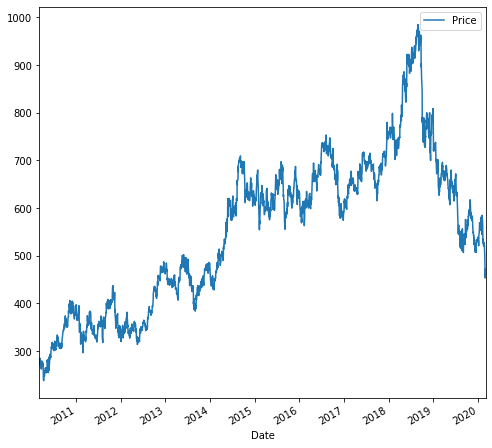

In [11]:

dta.plot(figsize=(8,8))
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [0]:

#split into test and train
percentage = 0.6
series = dta['Price'].tolist()
size = int(len(series) * 0.80)
train, test = series[0:size], series[size:len(series)]
model = ARIMA(train , order = (3,1,2))
model_fit = model.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


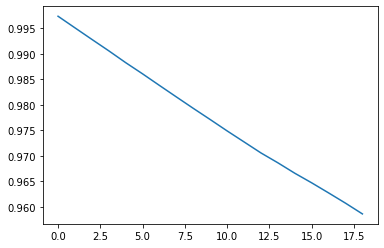

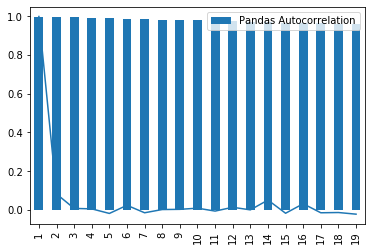

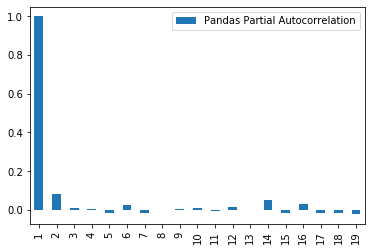

In [13]:
from statsmodels.tsa.stattools import acf, pacf
acf_1 = acf(series)[1:20]
plt.plot(acf_1)
test_df = pd.DataFrame([acf_1]).T
test_df.columns = ["Pandas Autocorrelation"]
test_df.index += 1
test_df.plot(kind='bar')
pacf_1 = pacf(series)[1:20]
plt.plot(pacf_1)
plt.show()
test_df = pd.DataFrame([pacf_1]).T
test_df.columns = ['Pandas Partial Autocorrelation']
test_df.index += 1
test_df.plot(kind='bar')
#from the figures we conclude that it is an AR process with a lag of 8-9

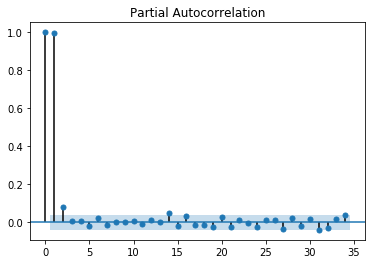

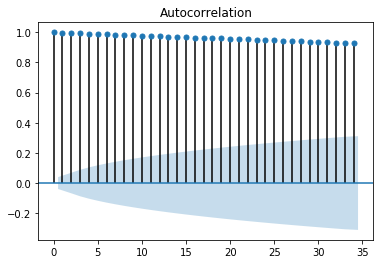

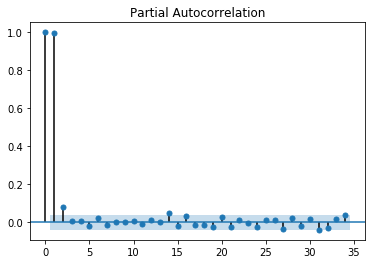

In [14]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(dta)
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(dta)

In [15]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from sklearn import preprocessing
from keras.wrappers.scikit_learn import KerasRegressor
from keras.layers.recurrent import LSTM

Using TensorFlow backend.


In [16]:
"""
Arima Rolling Forecast
"""
predicted1, resid_test = [], []
history = train
for t in range(len(test)):
    model = ARIMA(history, order=(3,1,2))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    resid_test.append(test[t] - output[0])
    predicted1.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
test_resid = []
for i in resid_test:
    test_resid.append(i[0])
error = mean_squared_error(test, predicted1)
print('Test MSE: %.3f' % error)


predicted=733.238786, expected=728.000000
predicted=730.897434, expected=727.000000
predicted=726.283600, expected=743.000000
predicted=743.177334, expected=721.000000
predicted=721.975572, expected=710.549988
predicted=714.277026, expected=726.900024
predicted=724.711025, expected=735.049988
predicted=735.350902, expected=736.950012
predicted=736.478134, expected=730.950012
predicted=732.521013, expected=731.000000
predicted=731.274933, expected=739.000000
predicted=738.946566, expected=741.750000
predicted=741.440769, expected=740.400024
predicted=741.190888, expected=743.000000
predicted=742.974518, expected=747.049988
predicted=747.090522, expected=725.000000
predicted=727.222131, expected=734.349976
predicted=735.102049, expected=749.000000
predicted=746.876386, expected=744.000000
predicted=745.200504, expected=748.900024
predicted=748.654326, expected=748.000000
predicted=748.326705, expected=773.000000
predicted=771.017820, expected=770.000000
predicted=769.223524, expected=774

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=749.028400, expected=738.500000
predicted=739.163534, expected=775.000000
predicted=772.086060, expected=753.599976
predicted=754.552773, expected=789.200012
predicted=786.358996, expected=748.099976


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=752.331881, expected=747.000000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=747.957982, expected=730.500000
predicted=731.918431, expected=740.799988
predicted=739.729080, expected=728.000000
predicted=729.369625, expected=731.000000
predicted=731.363478, expected=728.000000
predicted=728.391867, expected=751.000000
predicted=748.477118, expected=749.000000
predicted=749.622191, expected=770.500000
predicted=768.872374, expected=765.049988
predicted=765.381681, expected=784.000000
predicted=782.413553, expected=780.000000
predicted=780.928099, expected=788.000000
predicted=787.223825, expected=800.000000
predicted=798.808904, expected=798.000000
predicted=798.746855, expected=775.500000
predicted=778.065796, expected=793.099976
predicted=791.375212, expected=774.000000
predicted=776.236231, expected=767.650024
predicted=768.879834, expected=775.299988
predicted=774.673853, expected=780.000000
predicted=779.474232, expected=787.799988
predicted=787.459418, expected=770.099976
predicted=772.312114, expected=748.000000
predicted=750.379003, expected=747

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=564.752691, expected=558.700012
predicted=559.410928, expected=537.900024


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=540.548065, expected=562.799988
predicted=560.357574, expected=557.750000
predicted=557.857147, expected=551.000000
predicted=552.739150, expected=558.000000
predicted=556.781314, expected=565.049988
predicted=564.398974, expected=561.099976
predicted=562.463156, expected=556.000000
predicted=555.678498, expected=576.000000
predicted=574.636491, expected=568.549988
predicted=569.788709, expected=562.900024
predicted=562.777474, expected=568.000000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=568.672200, expected=582.500000
predicted=581.316338, expected=581.099976
predicted=580.732479, expected=589.000000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=589.456177, expected=593.400024


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=592.341200, expected=596.900024


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=596.773319, expected=592.000000
predicted=593.363357, expected=585.700012


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=585.374145, expected=590.000000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=589.834754, expected=595.450012


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=595.477635, expected=617.200012
predicted=614.613202, expected=617.599976
predicted=618.292031, expected=609.000000
predicted=609.675303, expected=591.000000
predicted=592.639545, expected=583.299988


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=584.157268, expected=590.250000
predicted=589.289383, expected=579.799988
predicted=580.307677, expected=578.000000
predicted=578.813217, expected=581.700012
predicted=581.016149, expected=574.000000
predicted=574.631267, expected=575.200012
predicted=576.055341, expected=583.750000
predicted=582.287648, expected=580.099976
predicted=580.780427, expected=573.750000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=575.051991, expected=562.250000
predicted=563.125500, expected=560.500000
predicted=561.192867, expected=554.750000
predicted=555.514938, expected=547.500000
predicted=548.099778, expected=550.000000
predicted=550.368420, expected=542.000000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=542.164689, expected=541.900024


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=541.793669, expected=543.000000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=543.959263, expected=525.000000
predicted=526.206797, expected=537.250000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=536.624812, expected=522.799988


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=524.686082, expected=525.549988


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=524.468587, expected=527.799988


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=528.399429, expected=510.200012


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=511.906198, expected=514.599976


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=513.571178, expected=507.649994


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=509.228525, expected=511.000000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=510.484205, expected=514.549988


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=513.893900, expected=516.000000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=516.879935, expected=509.899994


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=509.862274, expected=506.899994


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=507.237490, expected=524.500000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=523.779547, expected=533.500000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=531.949787, expected=529.950012


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=530.776030, expected=529.000000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=529.598833, expected=530.000000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=529.126550, expected=529.900024


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=530.753826, expected=531.349976


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=531.320895, expected=538.650024


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=537.425247, expected=532.900024


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=534.419589, expected=537.000000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=536.352331, expected=538.950012


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=538.511442, expected=529.900024


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=531.704736, expected=528.900024


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=528.381577, expected=520.900024


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=521.711512, expected=529.849976


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=529.898244, expected=544.099976


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=542.064619, expected=548.900024


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=549.040067, expected=554.950012


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=554.952937, expected=562.000000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=560.603211, expected=569.250000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=569.522186, expected=566.799988


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=567.094024, expected=569.000000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=568.254918, expected=564.000000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=565.475253, expected=553.500000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=554.054184, expected=553.500000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=553.310153, expected=566.099976


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=565.997047, expected=565.000000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=564.442573, expected=581.250000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=580.162309, expected=577.500000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=578.527864, expected=578.000000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=577.226914, expected=570.799988


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=572.076426, expected=545.000000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=547.176964, expected=562.000000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=560.972939, expected=580.250000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=578.540573, expected=585.000000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=584.706635, expected=579.000000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=579.971306, expected=566.799988
predicted=567.051125, expected=533.200012


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=536.121778, expected=526.650024


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=527.156302, expected=530.450012


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=530.095939, expected=535.250000
predicted=535.149040, expected=524.099976
predicted=524.935134, expected=520.500000
predicted=521.075873, expected=528.150024


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=527.979649, expected=525.900024


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=526.031235, expected=522.000000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=522.293184, expected=515.549988


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=516.548060, expected=507.700012


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=508.137027, expected=504.000000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=504.443219, expected=485.000000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=486.944494, expected=453.549988
predicted=455.295357, expected=462.000000
predicted=462.473107, expected=466.049988
predicted=465.300657, expected=472.700012
predicted=471.856292, expected=458.850006
Test MSE: 175.278


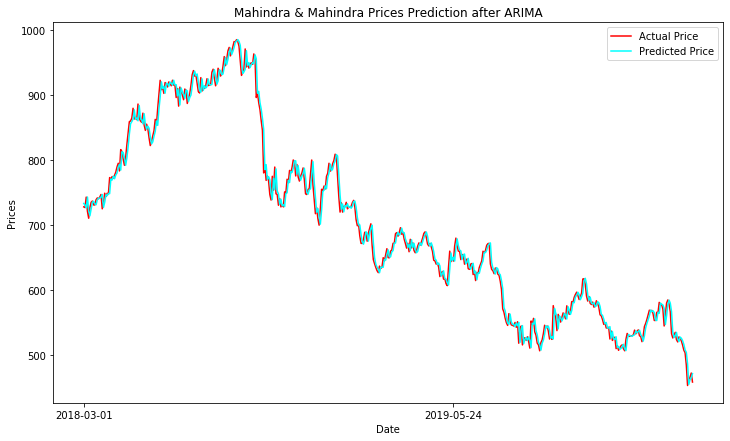

In [17]:
plt.figure(figsize=(12,7))
plt.plot(test, color= 'red', label='Actual Price')
plt.plot(predicted1 , color = 'cyan', label='Predicted Price')
plt.title('Mahindra & Mahindra Prices Prediction after ARIMA')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.xticks(np.arange(0,600, 300), df['Date'][1978:2473:300])
plt.legend()

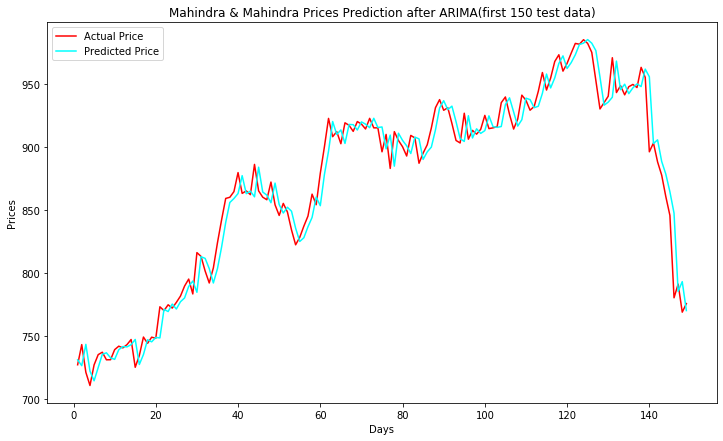

In [18]:
plt.figure(figsize=(12,7))
Y = pd.DataFrame(test)[1:150]
pred = pd.DataFrame(predicted1)[1:150]
plt.plot(Y, color= 'red', label='Actual Price')
plt.plot(pred , color = 'cyan', label='Predicted Price')
plt.title('Mahindra & Mahindra Prices Prediction after ARIMA(first 150 test data)')
plt.xlabel('Days')
plt.ylabel('Prices')
plt.legend()

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1978
Model:                     ARMA(1, 0)   Log Likelihood               -7201.451
Method:                       css-mle   S.D. of innovations              9.211
Date:                Thu, 12 Mar 2020   AIC                          14408.902
Time:                        17:10:19   BIC                          14425.672
Sample:                             0   HQIC                         14415.063
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        508.8828    109.332      4.654      0.000     294.595     723.170
ar.L1.y        0.9985      0.001    845.283      0.000       0.996       1.001
                                    Roots           

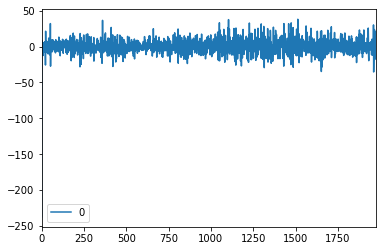

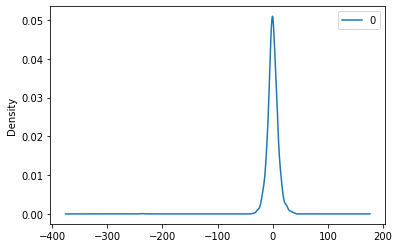

                 0
count  1978.000000
mean      0.120607
std      10.646327
min    -237.632781
25%      -4.981187
50%      -0.015125
75%       5.597431
max      38.171976


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


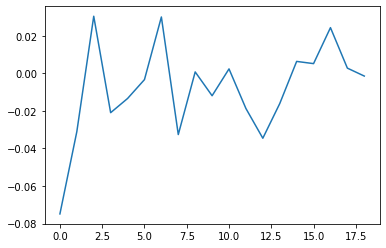

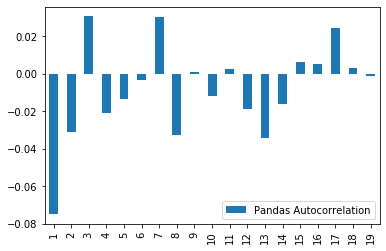

In [19]:
"""
Residual Diagnostics
"""
train, test = series[0:size], series[size:len(series)]
model = ARIMA(train, order=(1,0,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())
#plot the acf for the residuals
acf_1 = acf(model_fit.resid)[1:20]
plt.plot(acf_1)
test_df = pd.DataFrame([acf_1]).T
test_df.columns = ["Pandas Autocorrelation"]
test_df.index += 1
test_df.plot(kind='bar')
#from the acf obtained from the residuals we concule that 
#there is still a nonlinear relationship among the residuals

In [20]:
print(len(residuals))

1978


In [23]:
"""
Hybrid Model
"""
window_size = 50
def make_model(window_size):
    model = Sequential()
    model.add(Dense(50, input_dim=window_size, init="uniform",
    activation="tanh"))
    model.add(Dense(10, init="uniform", activation="tanh"))
    model.add(Dense(1))
    model.add(Activation("linear"))
    model.compile(loss='mean_squared_error', optimizer='Adadelta')
    return model

#def make_lstm_model():
#   model = Sequential()
#   model.add(LSTM(
#        input_dim=1,
#        output_dim=50,
#        return_sequences=True))
#   model.add(Dropout(0.2))
#   model.add(LSTM(
#        100,
#        return_sequences=False))
#   model.add(Dropout(0.2))

#   model.add(Dense(
#        output_dim=1))
#   model.add(Activation("linear"))
#   model.compile(loss="mse", optimizer="rmsprop")
#   return model

model = make_model(50)
#lstm_model = make_lstm_model()
min_max_scaler = preprocessing.MinMaxScaler()
train = np.array(train).reshape(-1,1)

train_scaled = min_max_scaler.fit_transform(test_data) 

train_X,train_Y = [],[]
for i in range(0 , len(train_scaled) - window_size):
    train_X.append(train_scaled[i:i+window_size])
    train_Y.append(train_scaled[i+window_size])

new_train_X,new_train_Y = [],[]
for i in train_X:
    new_train_X.append(i.reshape(-1))
for i in train_Y:
    new_train_Y.append(i.reshape(-1))
new_train_X = np.array(new_train_X)
new_train_Y = np.array(new_train_Y)
#new_train_X = np.reshape(new_train_X, (new_train_X.shape[0], new_train_X.shape[1], 1))
model.fit(new_train_X,new_train_Y, nb_epoch=500, batch_size=512, validation_split = .05)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(50, input_dim=50, activation="tanh", kernel_initializer="uniform")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, activation="tanh", kernel_initializer="uniform")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:53: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.




Train on 470 samples, validate on 25 samples
Epoch 1/500





470/470 [==============================] - 1s 1ms/step - loss: 0.0054 - val_loss: 0.0036
Epoch 2/500
470/470 [==============================] - 0s 14us/step - loss: 0.0039 - val_loss: 0.0027
Epoch 3/500
470/470 [==============================] - 0s 8us/step - loss: 0.0030 - val_loss: 0.0020
Epoch 4/500
470/470 [==============================] - 0s 10us/step - loss: 0.0024 - val_loss: 0.0016
Epoch 5/500
470/470 [==============================] - 0s 5us/step - loss: 0.0020 - val_loss: 0.0013
Epoch 6/500
470/470 [==============================] - 0s 5us/step - loss: 0.0018 - val_loss: 0.0011
Epoch 7/500
470/470 [==============================] - 0s 5us/step - loss: 0.0015 - val_loss: 9.0008e-04
Epoch 8/500
470/470 [==============================] - 0s 5us/step - loss: 0.0014 - val_loss: 7.7149e-04
Epoch 9/500
470/470 [==============================] - 0s 5us/step - loss: 0.0012 - val_loss: 6.6931e-04
Epoch 10/500
470/470 [===

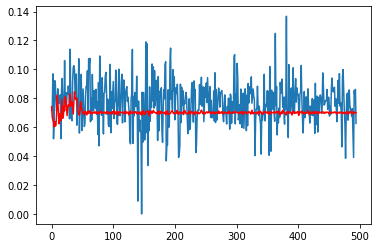

Test MAE: 204.015


In [26]:
test_extended = train.tolist()[-1*window_size:] + test_resid
test_data = []
for i in test_extended:
    try:
        test_data.append(i[0])
    except:
        test_data.append(i)
test_data = np.array(test_data).reshape(-1,1)
min_max_scaler = preprocessing.MinMaxScaler()
test_scaled = min_max_scaler.fit_transform(test_data)
test_X,test_Y = [],[]
for i in range(0 , len(test_scaled) - window_size):
    test_X.append(test_scaled[i:i+window_size])
    test_Y.append(test_scaled[i+window_size])
    new_test_X,new_test_Y = [],[]
for i in test_X:
    new_test_X.append(i.reshape(-1))
for i in test_Y:
    new_test_Y.append(i.reshape(-1))
new_test_X = np.array(new_test_X)
new_test_Y = np.array(new_test_Y)
#new_test_X = np.reshape(new_test_X, (new_test_X.shape[0], new_test_X.shape[1], 1))
predictions = model.predict(new_train_X)
predictions_rescaled=min_max_scaler.inverse_transform(predictions)
Y = pd.DataFrame(new_train_Y)
pred = pd.DataFrame(predictions)
plt.plot(Y)
plt.plot(pred , color = 'r')
#p.plot()
plt.show()
error = mse(test_resid,predictions_rescaled)
print('Test MAE: %.3f' % error)

In [27]:
print(len(new_train_X))

495


In [0]:
from sklearn.metrics import mean_absolute_error   #MAE
from sklearn.metrics import mean_squared_error as mse   #MSE

def parser(x):
    return datetime.strptime(x,'%Y-%m')

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())  #RMSE

def RMSLE(predict, target):                   #Root Mean Squared Logarithmic Error
    total = 0 
    for k in range(len(predict)):
        LPred= np.log1p(predict[k]+1)
        LTarg = np.log1p(target[k] + 1)
        if not (math.isnan(LPred)) and  not (math.isnan(LTarg)): 
            total = total + ((LPred-LTarg) **2)
        
    total = total / len(predict)        
    return np.sqrt(total)

def mean_absolute_percentage_error(y_true, y_pred): #MAPE
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true))

def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))  #Symmetric Mean Absolute Percentage Error (SMAPE)

In [29]:
pred_final = predictions_rescaled + predicted1
error = mean_absolute_error(test,pred_final)
print('Test MAE: %.3f' % error)

Test MAE: 10.975


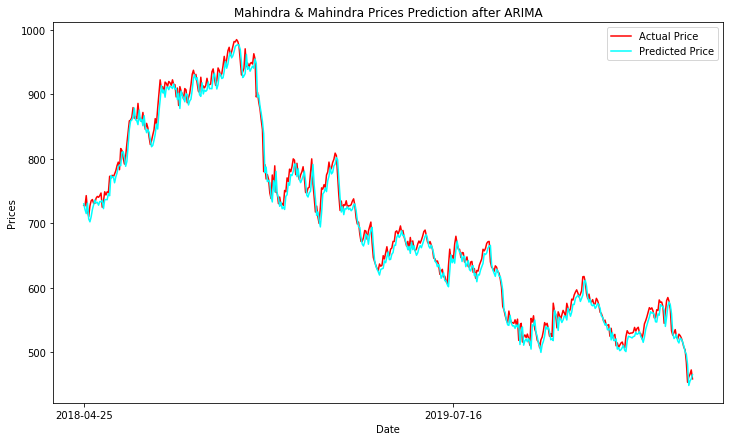

In [30]:
plt.figure(figsize=(12,7))
Y = pd.DataFrame(test)
pred = pd.DataFrame(pred_final)
plt.plot(Y, color= 'red', label='Actual Price')
plt.plot(pred , color = 'cyan', label='Predicted Price')
plt.title('Mahindra & Mahindra Prices Prediction after ARIMA')
#p.plot()
plt.xlabel('Date')
plt.ylabel('Prices')
plt.xticks(np.arange(0,500, 300), df['Date'][2014:2518:300])
plt.legend()

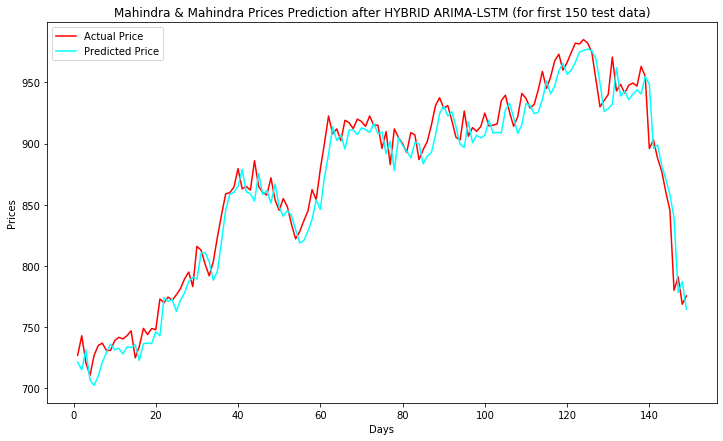

In [31]:
plt.figure(figsize=(12,7))
Y = pd.DataFrame(test)[1:150]
pred = pd.DataFrame(pred_final)[1:150]
plt.plot(Y, color= 'red', label='Actual Price')
plt.plot(pred , color = 'cyan', label='Predicted Price')
plt.xlabel('Days')
plt.ylabel('Prices')
plt.title('Mahindra & Mahindra Prices Prediction after HYBRID ARIMA-LSTM (for first 150 test data)')
plt.legend()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


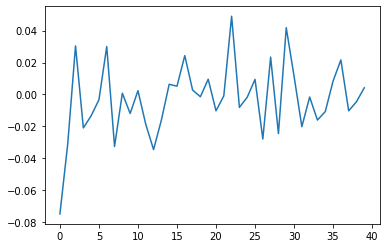

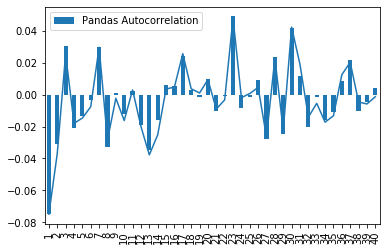

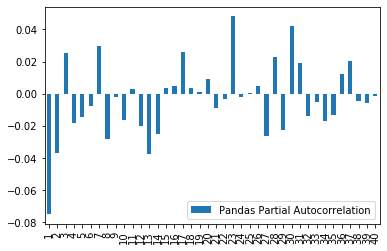

In [32]:
from statsmodels.tsa.stattools import acf, pacf
acf_2 = acf(model_fit.resid)[1:100]
plt.plot(acf_2)
test_df = pd.DataFrame([acf_2]).T
test_df.columns = ["Pandas Autocorrelation"]
test_df.index += 1
test_df.plot(kind='bar')
pacf_2 = pacf(model_fit.resid)[1:100]
plt.plot(pacf_2)
plt.show()
test_df = pd.DataFrame([pacf_2]).T
test_df.columns = ['Pandas Partial Autocorrelation']
test_df.index += 1
test_df.plot(kind='bar')
#from the figures we conclude that it is an AR process with a lag of 8-9

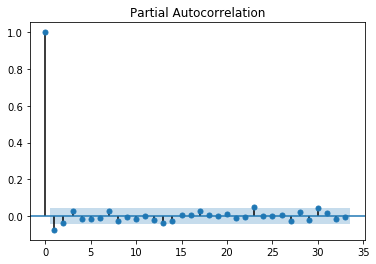

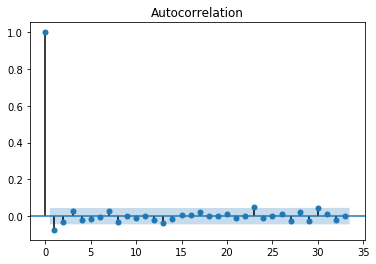

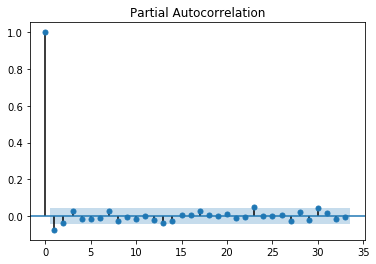

In [33]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(model_fit.resid)
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(model_fit.resid)

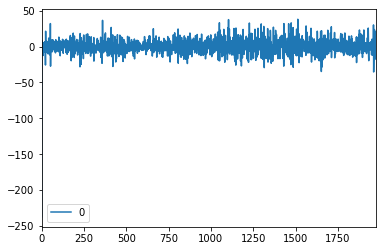

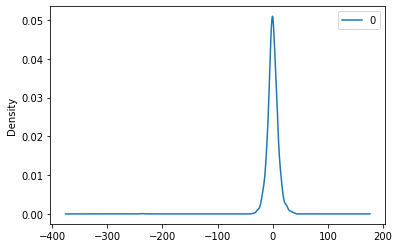

In [34]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()

In [35]:
import math
error = mean_squared_error(test,pred_final)
print('MSE: %.3f' % error)

error = mean_absolute_error(test,pred_final)
print('MAE: %.3f' % error)

error = rmse(test,pred_final)
print('RMSE: %.3f' % error)

error = RMSLE(test,pred_final)
print('RMSLE: %.3f' % error)

error = mean_absolute_percentage_error(test,pred_final)
print('MAPE: %.3f' % error)

error2 = smape_kun(test,pred_final)
print('SMAPE: %.3f' % error2)

MSE: 204.015
MAE: 10.975
RMSE: 196.943
RMSLE: 0.021
MAPE: 0.231
SMAPE: 22.519
